In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [35]:
cc = pd.read_csv("Data/data_clean.csv")
cc[cc.cycle_length == 35]

,Unnamed: 0,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
1916,8888,8898,2746,2017-01-06,2017-02-09,1,35,2017-01-06,1,35.400000,44.105840,17.836755,348,-1.066625,-1.049811,0.714592,0.207513,0.027541,0.598386
1917,8889,8899,2746,2017-01-06,2017-02-09,1,35,2017-01-07,2,35.210000,44.704738,18.120971,348,-0.626280,-0.840461,0.002192,0.324589,0.080038,0.436032
1918,8890,8900,2746,2017-01-06,2017-02-09,1,35,2017-01-08,3,35.410000,44.302055,17.332996,348,-1.847115,-0.981222,0.752087,0.000000,0.044740,0.606931
1919,8891,8901,2746,2017-01-06,2017-02-09,1,35,2017-01-09,4,35.670000,44.060928,17.458855,348,-1.652118,-1.065510,1.726950,0.051845,0.023604,0.829100
1920,8892,8902,2746,2017-01-06,2017-02-09,1,35,2017-01-10,5,35.410000,46.123961,17.918133,348,-0.940544,-0.344360,0.752087,0.241034,0.204442,0.606931
1921,8893,8903,2746,2017-01-06,2017-02-09,1,35,2017-01-11,6,35.870000,45.868748,17.851507,348,-1.043769,-0.433572,2.476844,0.213590,0.182071,1.000000
1922,8894,8904,2746,2017-01-06,2017-02-09,1,35,2017-01-12,7,35.291331,47.027522,18.470812,348,-0.084261,-0.028513,0.307142,0.468699,0.283645,0.505529
1923,8895,8905,2746,2017-01-06,2017-02-09,1,35,2017-01-13,8,35.170339,44.968690,18.016656,348,-0.787899,-0.748194,-0.146515,0.281619,0.103175,0.402141
1924,8896,8906,2746,2017-01-06,2017-02-09,1,35,2017-01-14,9,35.049738,47.965019,18.629565,348,0.161701,0.299196,-0.598706,0.534094,0.365822,0.299088
1925,8897,8907,2746,2017-01-06,2017-02-09,1,35,2017-01-15,10,34.956130,55.199831,19.760602,348,1.914052,2.828183,-0.949688,1.000000,1.000000,0.219100


In [3]:
md = pd.read_csv("Data/missingdays_reglen.csv")
md.head()

,Unnamed: 0,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
0,0,0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.11,68.375941,16.081958,0,2.260843,-0.468058,1.726723,1.000000,0.364814,1.000000
1,1,1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.70,67.499289,15.681856,0,0.339442,-0.735759,0.340735,0.554026,0.297386,0.658333
2,2,2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.38,63.632920,15.381588,0,-1.102533,-1.916423,-0.741011,0.219331,0.000000,0.391667
3,3,3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.64,66.366427,15.448914,0,-0.779214,-1.081699,0.137908,0.294376,0.210251,0.608333
4,4,4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.87,66.680990,15.823407,0,1.019206,-0.985641,0.915413,0.711805,0.234445,0.800000


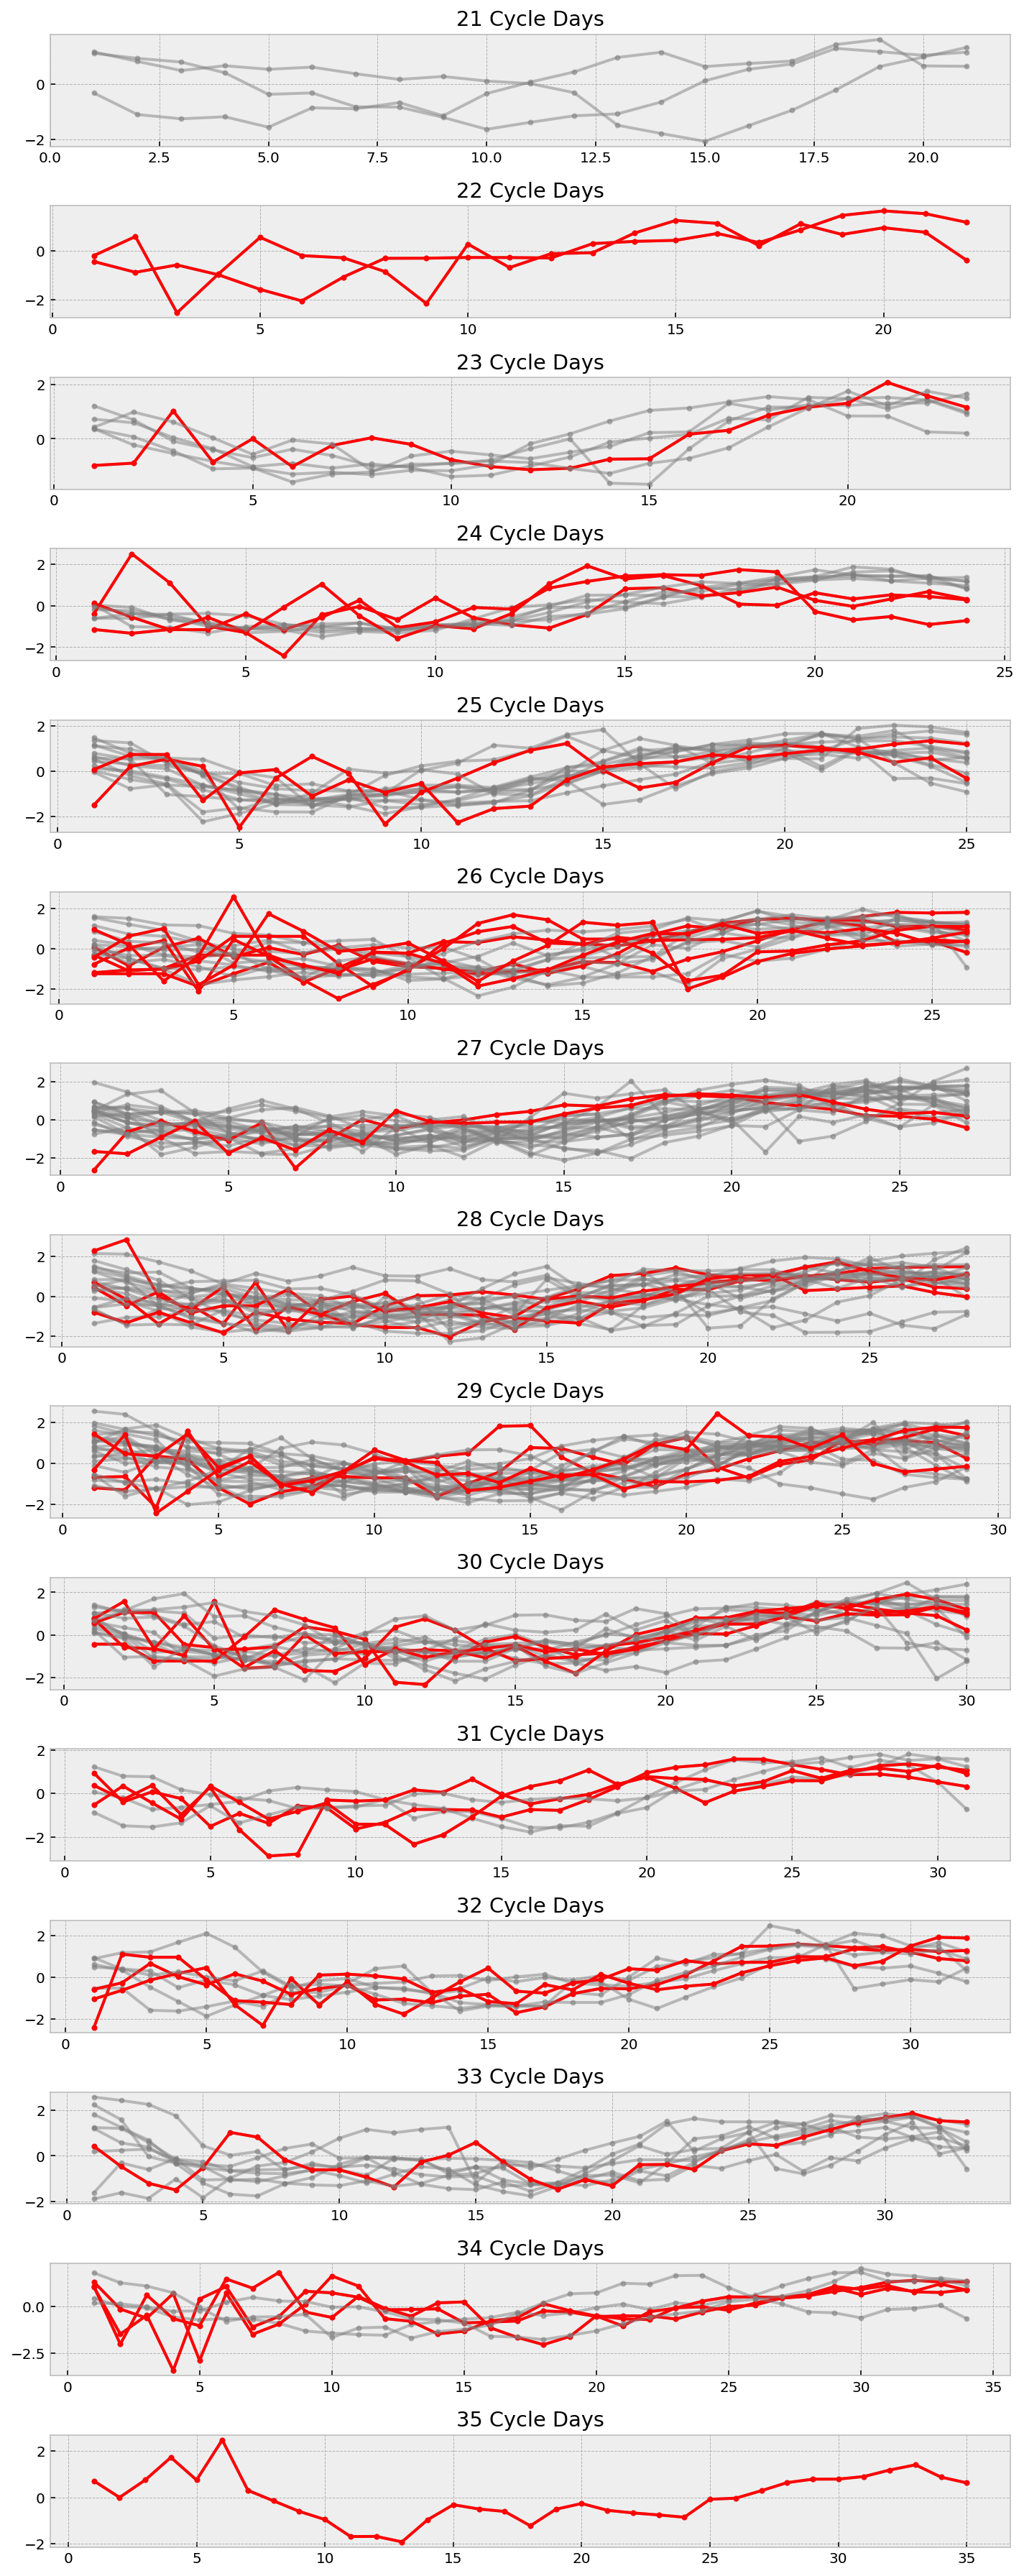

In [39]:
i = 0
df = cc
feature = "st_norm"

bins = 10
alpha = 0.7

fig = plt.figure(figsize = (10,25))
with plt.style.context(('bmh')):
    for l in sorted(cc.cycle_length.unique()):
        df_temp = df[df.cycle_length == l]
        ax = fig.add_subplot(len(df.cycle_length.unique()),1,i+1)
        for cycle in df_temp.cycle_index.unique():
            df_ttemp = df_temp[df_temp.cycle_index == cycle]

            ax.plot(df_ttemp[df_ttemp.cycle_index == cycle]["cycle_day"], df_ttemp[df_ttemp.cycle_index == cycle][feature],linestyle='-', marker = ".", alpha = 0.5, c = "gray")
            df_ttemp_first =  df_ttemp[df_ttemp.cycle_number == 1]
            for cycle in df_ttemp_first.cycle_index.unique():
                ax.plot(df_ttemp_first[df_ttemp_first.cycle_index == cycle]["cycle_day"], df_ttemp_first[df_ttemp_first.cycle_index == cycle][feature],linestyle='-', marker = ".", c="r")
        i+=1
        plt.title(str(l)+" Cycle Days")
        plt.tight_layout()

In [21]:
md.cycle_length.unique()

array([25, 35, 31, 28, 21, 24, 27, 26, 29, 23, 22, 30, 32, 33, 36, 34])